In [18]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data ={ 'age':[255,30,40,22],
        'income':[300000,45000,60000,25000],
        'loan_approval':[1,0,1,0]     
	}

In [3]:
data

{'age': [255, 30, 40, 22],
 'income': [300000, 45000, 60000, 25000],
 'loan_approval': [1, 0, 1, 0]}

In [5]:
df =pd.DataFrame(data)
correlation=df.corr()['loan_approval']
correlation

age              0.624048
income           0.648298
loan_approval    1.000000
Name: loan_approval, dtype: float64

In [6]:
sorted_features=correlation.sort_values(ascending=False)
sorted_features

loan_approval    1.000000
income           0.648298
age              0.624048
Name: loan_approval, dtype: float64

In [7]:
from sklearn.datasets import load_iris

In [8]:
data=load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [15]:
from sklearn.feature_selection import SelectKBest,f_classif
x,y=data.data,data.target

df=pd.DataFrame(data.data,columns= data.feature_names)
df['target']=data.target


In [13]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
k_best=SelectKBest(score_func=f_classif,k=2)

X_new=k_best.fit_transform(x,y)
selected_indices=k_best.get_support(indices=True)
selected_features= df.columns[selected_indices]
selected_features

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

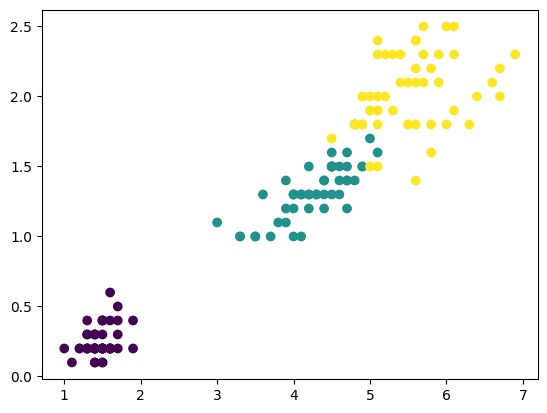

In [19]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'],c=y)#plot the most two important features

In [21]:
from sklearn.model_selection import KFold

In [23]:
k_fold=KFold(n_splits=5,shuffle=True,random_state=42)



In [25]:
for train_index,test_index in k_fold.split(x):
  x_train,x_text=x[train_index],x[test_index]
  y_train,y_test=y[train_index],y[test_index]
  print(x_train.shape)
  print(x_text.shape)

(120, 4)
(30, 4)
(120, 4)
(30, 4)
(120, 4)
(30, 4)
(120, 4)
(30, 4)
(120, 4)
(30, 4)


In [26]:
#hyperparameter tuning


In [86]:
from sklearn.model_selection import train_test_split,GridSearchCV, cross_validate
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

ValueError: Found input variables with inconsistent numbers of samples: [79, 1797]

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score

In [44]:
svm=SVC()
param_grid={'C':[0.1,1,10,100],'kernel':['linear','rbf','poly'],'gamma':['scale','auto',0.1,0.01,0.001]}
grid_search=GridSearchCV(svm,param_grid,cv=5,scoring="accuracy")

In [45]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [46]:
grid_search.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}

In [47]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [48]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9736842105263158

In [49]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [40]:
conf_matrix

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [41]:
class_report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        13\n           1       1.00      0.94      0.97        16\n           2       0.90      1.00      0.95         9\n\n    accuracy                           0.97        38\n   macro avg       0.97      0.98      0.97        38\nweighted avg       0.98      0.97      0.97        38\n'

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

In [54]:
digits = load_digits()
x,y=digits.data,digits.target

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [56]:
classifier=RandomForestClassifier()

In [58]:
 for x in np.linspace(start = 10, stop = 80, num = 10):
    print(x)
    

10.0
17.77777777777778
25.555555555555557
33.33333333333333
41.111111111111114
48.888888888888886
56.666666666666664
64.44444444444444
72.22222222222223
80.0


In [66]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [67]:
# Create the param grid
param_grid1 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid1)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [61]:
param_grid = {'n_estimators': [10,50,100,200],
               #'max_features': max_features,
               'max_depth': [None,10,20,30],
               'min_samples_split':[2,5,10],
               'min_samples_leaf': [1,2,4]
               #'bootstrap': bootstrap}
}
print(param_grid)

{'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [63]:
random_search = RandomizedSearchCV(classifier,param_distributions=param_grid,n_iter=1,cv=5,random_state=42)

In [64]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=42)

In [68]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 20}

In [70]:
y_pred = random_search.best_estimator_.predict(X_test)
y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 0, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 7, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       9, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 3, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [71]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9711111111111111

In [72]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 41,  1,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0, 43,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  1, 46,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 45]], dtype=int64)

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
KNeighborsClassifier=KNeighborsClassifier()

In [81]:
#n_neighbors = [5,6,7]
n_neighbors=[int(x) for x in np.linspace(start = 5, stop = 1000, num = 10)]
weights = ['uniform' , 'distance']
algorithm = ['auto' , 'ball_tree' , 'kd_tree' ,'brute']
parameters = dict(n_neighbors = n_neighbors , weights = weights ,algorithm = algorithm )
parameters

{'n_neighbors': [5, 115, 226, 336, 447, 557, 668, 778, 889, 1000],
 'weights': ['uniform', 'distance'],
 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [80]:
n_neighbors=[int(x) for x in np.linspace(start = 5, stop = 100, num = 10)]
n_neighbors

[5, 15, 26, 36, 47, 57, 68, 78, 89, 100]

In [78]:
print(*range(1, 101), end=' ')

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

In [82]:
clf = RandomizedSearchCV(KNeighborsClassifier, parameters, cv=5 , n_iter = 15)
clf.fit(X_train,y_train)
print('score : ' , clf.best_score_)
print('params : ' , clf.best_params_)
print('best : ' , clf.best_estimator_)

score :  0.913897838358805
params :  {'weights': 'distance', 'n_neighbors': 115, 'algorithm': 'brute'}
best :  KNeighborsClassifier(algorithm='brute', n_neighbors=115, weights='distance')


In [83]:
y_pred = clf.best_estimator_.predict(X_test)
y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       7, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 0, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 2, 4, 7,
       3, 4, 8, 9, 7, 7, 8, 0, 6, 9, 2, 5, 6, 4, 1, 7, 0, 6, 1, 5, 9, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 7, 7, 6, 7, 6, 5, 6, 0, 8, 1, 9, 3, 6, 1, 0, 4, 2, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 3, 1, 4, 7, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 3, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 1, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 1, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [90]:
CrossValidate = cross_validate(KNeighborsClassifier,X_train,y_train,cv=5,return_train_score = True)
print('Train Score Value : ', CrossValidate['train_score'])
print('Test Score Value : ', CrossValidate['test_score'])
print('Fit Time : ', CrossValidate['fit_time'])
print('Score Time : ', CrossValidate['score_time'])

Train Score Value :  [0.99257196 0.98885794 0.98979592 0.99072356 0.98886827]
Test Score Value :  [0.98888889 0.9962963  0.9739777  0.98513011 0.98513011]
Fit Time :  [0.002002   0.00200438 0.00100279 0.00100088 0.00099778]
Score Time :  [0.01599932 0.00699735 0.00500083 0.00599957 0.00399852]


In [84]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9177777777777778